In [39]:
import numpy as np
import pandas as pd

y = [200 if i % 2 == 0 else 150 for i in range(50)]
# y += [0 if i % 2 == 0 else 150 for i in range(50)]
data = pd.DataFrame(y, columns=['y'])

z = [250 if i % 2 == 0 else 170 for i in range(50)]
z += [200 if i % 2 == 0 else 150 for i in range(50)]
data['z'] = pd.Series(z)
# data.loc[0:50, 'y'] = 22
# data.loc[51:53, 'y'] = 255
# data.loc[54:100, 'y'] = 253
# data.loc[52:100, 'z'] = 1
data = data.reset_index()
data = data.rename(columns={'index':'x'})
data

,x,y,z
0,0,200,250
1,1,150,170
2,2,200,250
3,3,150,170
4,4,200,250
5,5,150,170
6,6,200,250
7,7,150,170
8,8,200,250
9,9,150,170


In [40]:
import matplotlib.pyplot as plt  # for display purposes
import ruptures as rpt  # our package

# n_samples, n_dims, sigma = 1000, 1, 2
# n_bkps = 4  # number of breakpoints
# signal, bkps = rpt.pw_constant(n_samples, n_dims, n_bkps, noise_std=sigma)

# detection
signal = np.array([[i] for i in data['y']])
algo = rpt.Dynp(model="l2", min_size=1, jump=1).fit(signal)
result = algo.predict(n_bkps=1)
print(result)

[1, 50]


In [37]:
data.loc[51:54, :]

,x,y,z
51,51,255,150
52,52,255,200
53,53,255,150
54,54,253,200


In [26]:
a = [1,2,3]
a[0:1]

[1]

In [31]:
if result[0] != 1:
    sub_data = data.loc[result[0]-1:result[1], :]
else:
    sub_data = data.loc[result[0]:result[1], :]

upper_boundary = sub_data['y'].values[0]
lower_boundary = sub_data['y'].values[-1]
for v in sub_data['y'].values[1:-2]:
    print(v)
    if (v > upper_boundary) & (v > lower_boundary):
        print('AbnormalUpPulse')
    elif (v < upper_boundary) & (v < lower_boundary):
        print('AbnormalDownPulse')
    elif (v > upper_boundary) & (v < lower_boundary):
        print('AbnormalDownPulse')

,x,y,z
50,50,22,200
51,51,255,150
52,52,255,200
53,53,255,150
54,54,100,200


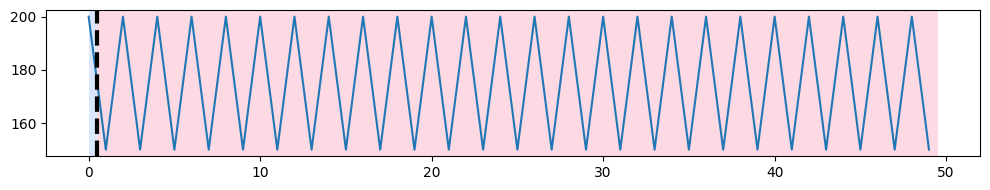

In [41]:
rpt.display(signal, result, result)
plt.show()

In [ ]:
signal = np.array([[y,z] for y,z in data[['y', 'z']].values])
algo = rpt.Dynp(model="l2", min_size=1, jump=1).fit(signal)
result = algo.predict(n_bkps=2)
print(result)

In [ ]:
rpt.display(signal, result, result)
plt.show()

In [42]:
a = [1,2,3]
a[0:10]

[1, 2, 3]

In [ ]:
import statsmodels.formula.api as smapi
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(data['y'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(data['y'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [ ]:
self.result = False
if ('packname' in self.text_analysis_model.alias_data['PackageName'].res_key_value) & ('errorname' in self.text_analysis_model.alias_data['ErrorName'].res_key_value):
    for item in self.text_analysis_model.alias_data['ErrorName'].res_key_value['errorname']['timestamp']:
        if self.text_analysis_model.alias_data['PackageName'].res_key_value['packname']['timestamp'][0] > item:
            self.result = True        
else:
    self.result = 'unknow'

In [ ]:
table = self.text_analysis_model.batch_statistic_model.table
tt = table.loc[(table['BeforeError'] == True) & (table['AfterError'] == False),:]
self.result = len(tt) / len(table)

In [ ]:
self.text_analysis_model.batch_statistic_model.table.to_csv('D:\\projects\\ericsson_flow\\test.csv', index=False)

In [ ]:
self.result = False
high_count = 0
low_count = 0
for v in self.text_analysis_model.alias_data['search_branchI'].res_key_value['txAtt']['value']:
    if v >= 255:
        high_count = high_count + 1
        
    if v <= 50:
        low_count = low_count + 1
if (high_count > 3) & (low_count > 3):
    self.result = True

In [ ]:
self.result = False
if len(self.text_analysis_model.alias_data['Deframer_interrupt_happened'].res_lines) > 0:
    self.result = True

In [ ]:
self.result = False
if (self.text_analysis_model.alias_data['branchI_txatt_bas'].result == True) | (self.text_analysis_model.alias_data['branchJ_txatt_bas'].result == True) | (self.text_analysis_model.alias_data['branchK_txatt_bas'].result == True) | (self.text_analysis_model.alias_data['branchL_txatt_bas'].result == True):
    self.result = True

In [ ]:
self.result = False
if (self.text_analysis_model.alias_data['branchI_txatt_bas'].result == True) & (self.text_analysis_model.alias_data['branchJ_txatt_bas'].result == True) & (self.text_analysis_model.alias_data['branchK_txatt_bas'].result == True) & (self.text_analysis_model.alias_data['branchL_txatt_bas'].result == True):
    self.result = True

In [1]:
import socketio
sio = socketio.AsyncClient(reconnection=False)
await sio.connect('http://127.0.0.1:8000', namespaces=['/TextAnalysis/FileContainer'])

In [2]:
await sio.emit('new_file', ['D:\\Projects\\ericsson_flow\\new_files\\E55G948878_LE_SARONGGE_BXP_6_telog.log'], namespace='/TextAnalysis/FileContainer')

In [3]:
await sio.emit('load_config', 'D:\\projects\\ericsson_flow\\new_files\\config1.txt', namespace='/TextAnalysis/FileContainer')

In [ ]:
# await sio.disconnect
sio = socketio.AsyncClient(reconnection=False)
await sio.connect('http://127.0.0.1:8000', namespaces=['/TextAnalysis/FileContainer', '/TextAnalysis/FileContainer/E55G948878_LE_SARONGGE_BXP_6_telog.log/TextFileFunction/SearchFunction/search_branchA'])

In [ ]:
def printm(model):
    print(model)

await sio.emit('model', namespace='/TextAnalysis/FileContainer/E55G948878_LE_SARONGGE_BXP_6_telog.log/TextFileFunction/SearchFunction/search_branchA', callback=printm)

In [ ]:
class A(object):
    def __init__(self):
        self.a = 1
        self.b = 2
        
    def __getattribute__(self, obj):
        print(obj)
        return object.__getattribute__(self, obj)
    
c = A()
c.a * c.b

In [ ]:
# from asyncio import get_event_loop
from text_analysis import *

# loop = get_event_loop()
# loop.run_until_complete(TextAnalysisModel('parallel'))

web.run_app(app, host="127.0.0.1", port=8000)

In [15]:
from dateutil.parser import parse as dp

str(dp('221210-12:40:51', yearfirst=True))

'2022-12-10 12:40:51'

In [14]:
if '2022-12-11 01:12:21.105110' > '2022-12-11 01:12:22':
    print(True)